In [33]:
from thinkdsp import *
import pandas as pd

wave = read_wave('data/sea.wav')
spectrum = wave.make_spectrum()

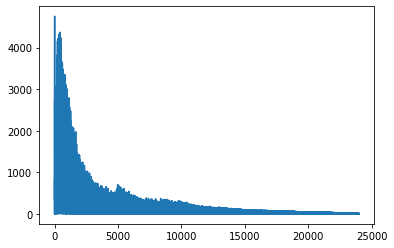

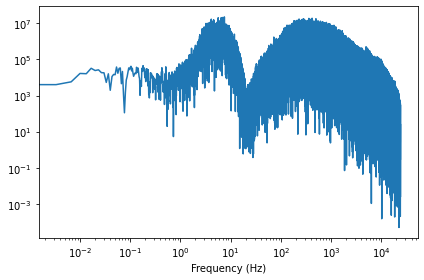

In [6]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

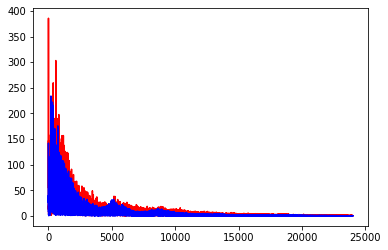

In [8]:
seg1 = wave.segment(start=10, duration=2)
seg2 = wave.segment(start=20, duration=2)
spec1 = seg1.make_spectrum()
spec2 = seg2.make_spectrum()
spec2.plot(color='red')
spec1.plot(color='blue')

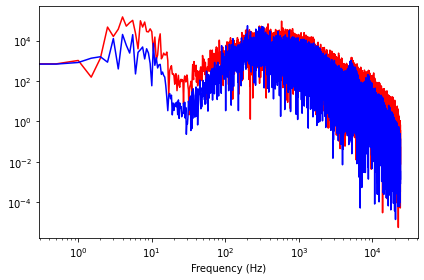

In [10]:
spec2.plot_power(color='red')
spec1.plot_power(color='blue')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

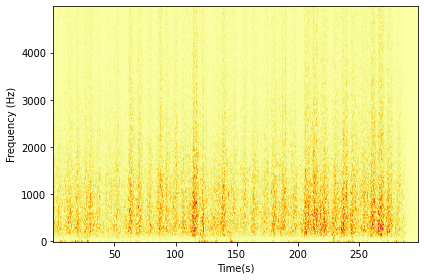

In [15]:
wave.make_spectrogram(2048).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

In [35]:
wave = read_wave('data/rain.wav')
spectrum = wave.make_spectrum()

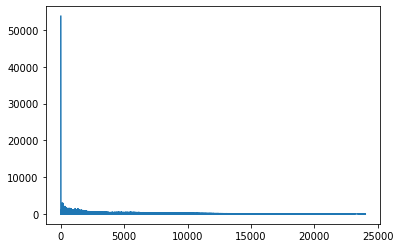

In [17]:
spectrum.plot()

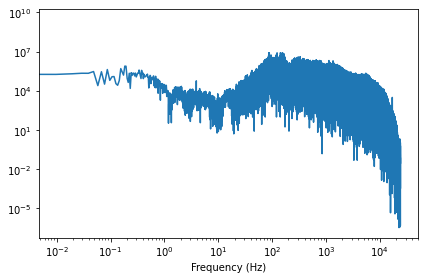

In [18]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

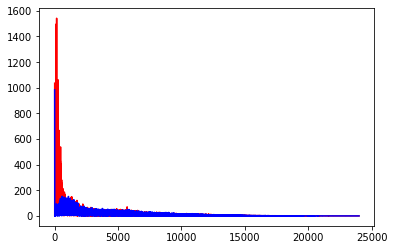

In [19]:
seg1 = wave.segment(start=10, duration=2)
seg2 = wave.segment(start=20, duration=2)
spec1 = seg1.make_spectrum()
spec2 = seg2.make_spectrum()
spec2.plot(color='red')
spec1.plot(color='blue')

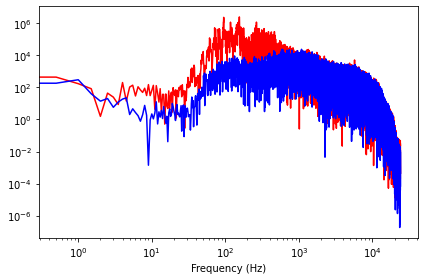

In [20]:
spec2.plot_power(color='red')
spec1.plot_power(color='blue')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

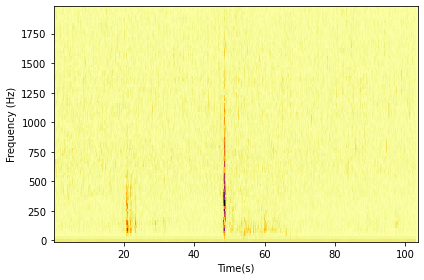

In [22]:
wave.make_spectrogram(2048).plot(high=2000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

In [29]:
def bartlett_method(wave, seg_length=512):
    spectro = wave.make_spectrogram(seg_length , True)
    spectrums = spectro.spec_map.values()
    pwrs = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(pwrs) / len(pwrs))
    fs = next(iter(spectrums)).fs
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

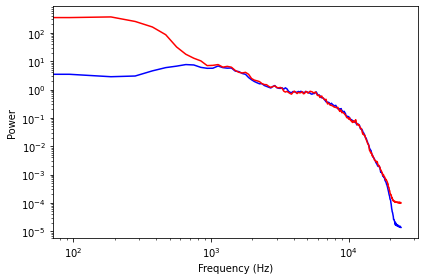

In [31]:
p1 = bartlett_method(seg1)
p2 = bartlett_method(seg2)
p1.plot_power(color='blue')
p2.plot_power(color='red')
decorate(xlabel='Frequency (Hz)',ylabel='Power',**loglog)

BITCOIN

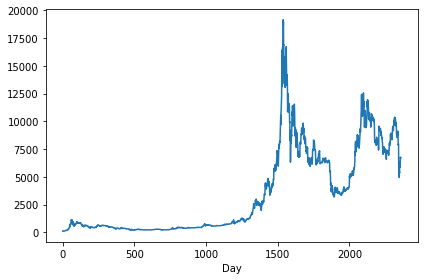

In [45]:
data = pd.read_csv('data/bitcoin.csv')
price = data['Closing Price (USD)']
count = data.index
wave = Wave(price,count,framerate=1)
wave.plot()
decorate(xlabel='Day')

-1.7332540936758956


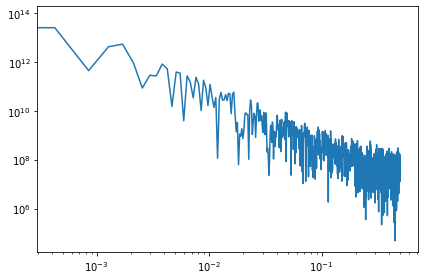

In [43]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(**loglog)
print(spectrum.estimate_slope()[0])

In [46]:
class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

53


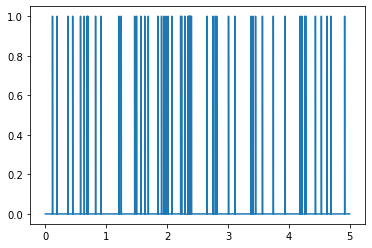

In [71]:
signal = UncorrelatedPoissonNoise(amp=0.001)
wave = signal.make_wave(duration=5, framerate=10000)
wave.plot()
print(sum(wave.ys))

0.008841564134846628


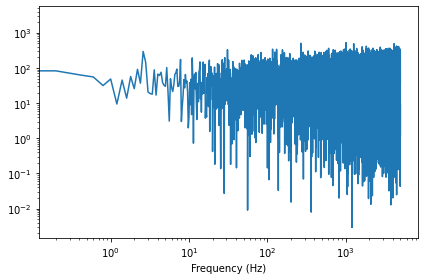

In [72]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',**loglog)
print(spectrum.estimate_slope()[0])

In [59]:
def voss(nrows , ncols=16):
    array = np.empty((nrows , ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows , size=n)
    array[rows, cols] = np.random.random(n)
    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)
    return total.values

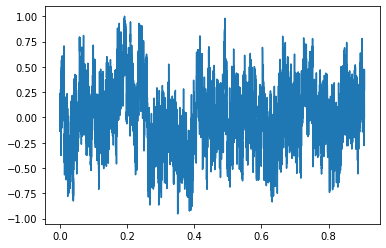

In [63]:
wave = Wave(voss(10000))
wave.unbias()
wave.normalize()
wave.plot()

-1.017691837950757


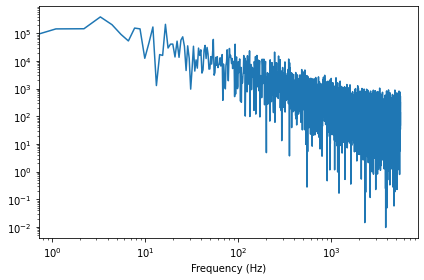

In [68]:
spectrum = wave.make_spectrum()
# don't break the math's laws
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',**loglog)
print(spectrum.estimate_slope()[0])